# 1.7.1 Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\Calibration\Image\*.png') #('.\Image\*.png')

In [5]:
len(images)

0

In [8]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cv2.imshow('img',img)

NameError: name 'img' is not defined

## Calibration

In [10]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

NameError: name 'gray' is not defined

In [11]:
mtx

NameError: name 'mtx' is not defined

In [12]:
dist

NameError: name 'dist' is not defined

In [13]:
print(rvecs)

NameError: name 'rvecs' is not defined

In [14]:
tvecs

NameError: name 'tvecs' is not defined

## Undistortion

In [15]:
img = cv2.imread('./Calibration/Image/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

AttributeError: 'NoneType' object has no attribute 'shape'

## 1. Using cv2.undistort()

In [16]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

NameError: name 'mtx' is not defined

TypeError: Image data of dtype object cannot be converted to float

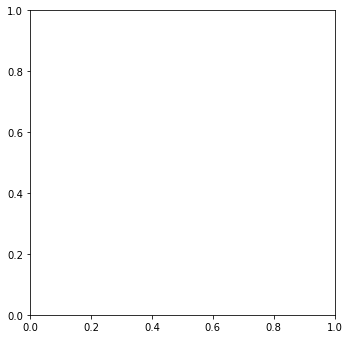

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [18]:
# undistort 
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

NameError: name 'mtx' is not defined

TypeError: Image data of dtype object cannot be converted to float

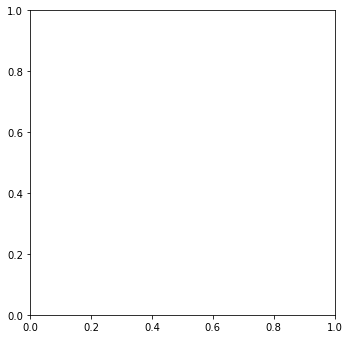

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [20]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.0895469680853578
